### Построение бинарного решающего дерева.

В качестве обучающей выборки возьмем 150 объектов трех классов ирисов (50 в каждом классе), распределенных в двумерном признаковом пространстве: длина лепестков и чашелистика

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
data = iris.data[:,::2]
target = iris.target

То есть, входные векторы будут иметь два числовых признака:
$$ x=[len1,len2] $$

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

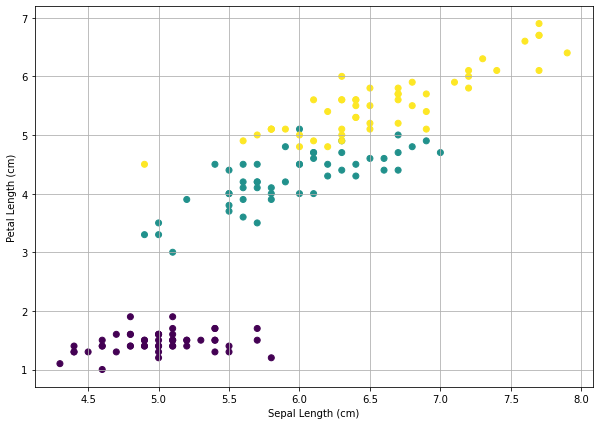

In [7]:
plt.scatter(data[:,0], data[:,1], c=target)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.grid()
plt.show()

Существует несколько распространенных алгоритмов построения решающих деревьев. Cамый простой из них называется ID3 (Iterative Dichotomiser 3), разработанный Россом Куинланом в 1986 году для задачи классификации. Этот алгоритм использует энтропию в качестве **информативности** и реализует **жадную стратегию**, то есть, в каждом узле дерева, начиная с корневого, находит такой признак $j$ и такой порог $t$, которые дают наибольшее значение показателя **информационный выигрыш**:
$$ j^*,t^*= \arg{\underset{j \in J, t \in T}{\max} Q(R_m,j,t)} = \arg{\underset{j \in J, t \in T}{\max} \left( H(R_m) - \frac{|R_l|}{|R_m|}H(R_l)-\frac{|R_r|}{|R_m|}H(R_r) \right) },  $$
где $R_m$ $-$ выборка, попавшая в текущую вершину, $R_l$ $-$ подвыборка, оказавшаяся в левой части, $R_r$ $-$ подвыборка, оказавшаяся в правой части.

Затем, построение рекурсивно повторяется для каждой новой вершины.

Вот пример разбиения обучающего множества деревом глубиной 4

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=4)
train = clf.fit(data, target)

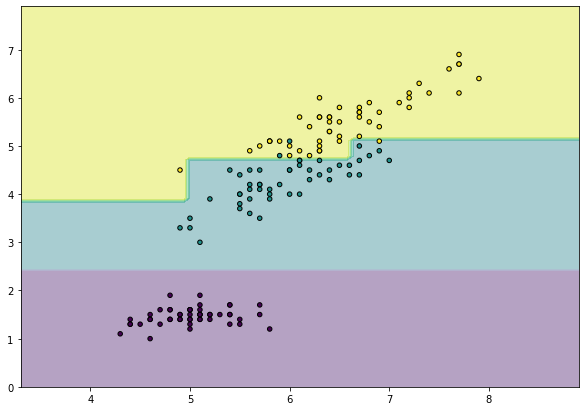

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
        clf, data, alpha=0.4, response_method="predict"
)
plt.scatter(data[:,0], data[:,1], c=target, s=20, edgecolor="k")

plt.show()

Само дерево имеет вид:

[Text(0.4444444444444444, 0.9, 'x[1] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'x[1] <= 4.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\nentropy = 0.154\nsamples = 45\nvalue = [0, 44, 1]'),
 Text(0.2222222222222222, 0.3, 'x[1] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= 5.15\nentropy = 0.497\nsamples = 55\nvalue = [0, 6, 49]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 6.6\nentropy = 0.863\nsamples = 21\nvalue = [0, 6, 15]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.672\nsamples = 17\nvalue = [0, 3, 14]

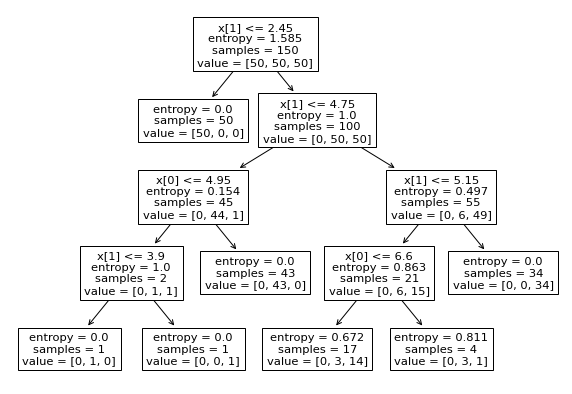

In [10]:
from sklearn.tree import plot_tree
plot_tree(train)

Отсюда хорошо видно, как происходило разбиение. Вначале были отделены все сиреневые объекты выборки по второму признаку (длина лепестка) с порогом $t = 2.45$ и предикатом $B_{j,t}(x)=[x_1 \leq 2.45]$. Если предикат выполняется, то попадаем в листовую вершину с нулевой энтропией и 50-ю представителями класса «сиреневых» объектов. Во вторую вершину попадает 100 объектов двух других классов с энтропией, равной 1. Далее, мы делим объекты второй вершины дерева также по второму признаку и уровню 4,75. Формируются следующие две вершины. И так далее, пока либо не будет достигнута нулевая энтропия и сформирован лист дерева, либо глубина дерева достигнет уровня 4. В каждой листовой вершине мы сохраняем метку класса с наибольшим числом представителей.